# Project: Wrangling and Analyze Data

## Data Gathering

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
from timeit import default_timer as timer
import configparser

%matplotlib inline

import requests
import os

### 1: Read `twitter-archive-enhanced.csv` dataset provided 

In [100]:
df_1 = pd.read_csv('./datasets/twitter-archive-enhanced.csv')

In [101]:
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 2: Download the tweet image prediction (`image-predictions.tsv`) programmatically

In [102]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [103]:
res = requests.get(url)

In [104]:
#save the file
with open('image-predictions.tsv', mode='wb') as f:
    f.write(res.content)

In [105]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [106]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3: Extracting Additional data using the tweepy library via Twitter API (`tweet_json.txt`)

In [107]:
#the secret keys are saved in config.ini file
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

#authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [56]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            #tweepy.errors.TweepError as e:
        except tweepy.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Rate limit reached. Sleeping for: 39


Success
1705: 680889648562991104
Success
1706: 680836378243002368
Success
1707: 680805554198020098
Success
1708: 680801747103793152
Success
1709: 680798457301471234
Success
1710: 680609293079592961
Success
1711: 680583894916304897
Success
1712: 680497766108381184
Success
1713: 680494726643068929
Success
1714: 680473011644985345
Success
1715: 680440374763077632
Success
1716: 680221482581123072
Success
1717: 680206703334408192
Success
1718: 680191257256136705
Success
1719: 680176173301628928
Success
1720: 680161097740095489
Success
1721: 680145970311643136
Success
1722: 680130881361686529
Success
1723: 680115823365742593
Success
1724: 680100725817409536
Success
1725: 680085611152338944
Success
1726: 680070545539371008
Success
1727: 680055455951884288
Fail
1728: 679877062409191424
Success
1729: 679872969355714560
Success
1730: 679862121895714818
Success
1731: 679854723806179328
Success
1732: 679844490799091713
Success
1733: 679828447187857408
Success
1734: 679777920601223168
Success
1735:

Success
1954: 673662677122719744
Success
1955: 673656262056419329
Success
1956: 673636718965334016
Success
1957: 673612854080196609
Success
1958: 673583129559498752
Success
1959: 673580926094458881
Success
1960: 673576835670777856
Success
1961: 673363615379013632
Success
1962: 673359818736984064
Success
1963: 673355879178194945
Success
1964: 673352124999274496
Success
1965: 673350198937153538
Success
1966: 673345638550134785
Success
1967: 673343217010679808
Success
1968: 673342308415348736
Success
1969: 673320132811366400
Success
1970: 673317986296586240
Success
1971: 673295268553605120
Success
1972: 673270968295534593
Success
1973: 673240798075449344
Success
1974: 673213039743795200
Success
1975: 673148804208660480
Success
1976: 672997845381865473
Success
1977: 672995267319328768
Success
1978: 672988786805112832
Success
1979: 672984142909456390
Success
1980: 672980819271634944
Success
1981: 672975131468300288
Success
1982: 672970152493887488
Success
1983: 672968025906282496
Success
19

Success
2203: 668643542311546881
Success
2204: 668641109086707712
Success
2205: 668636665813057536
Success
2206: 668633411083464705
Success
2207: 668631377374486528
Success
2208: 668627278264475648
Success
2209: 668625577880875008
Success
2210: 668623201287675904
Success
2211: 668620235289837568
Success
2212: 668614819948453888
Success
2213: 668587383441514497
Success
2214: 668567822092664832
Success
2215: 668544745690562560
Success
2216: 668542336805281792
Success
2217: 668537837512433665
Success
2218: 668528771708952576
Success
2219: 668507509523615744
Success
2220: 668496999348633600
Success
2221: 668484198282485761
Success
2222: 668480044826800133
Success
2223: 668466899341221888
Success
2224: 668297328638447616
Success
2225: 668291999406125056
Success
2226: 668286279830867968
Success
2227: 668274247790391296
Success
2228: 668268907921326080
Success
2229: 668256321989451776
Success
2230: 668248472370458624
Success
2231: 668237644992782336
Success
2232: 668226093875376128
Success
22

In [108]:
# read the tweet_json file
df_3 = pd.read_json('tweet_json.txt', lines=True)
df_3.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [109]:
#interested columns
df_3 = df_3[['id','retweet_count','favorite_count']]
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,7024,33861
1,892177421306343426,5304,29365
2,891815181378084864,3488,22087
3,891689557279858688,7237,36986
4,891327558926688256,7775,35364


In [110]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [111]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> some columns have null values and their datatype is not correct

In [112]:
#columns with null values
df_1.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [113]:
#check for duplicates
df_1.duplicated().any()

False

In [114]:
#number of unique sources
df_1.source.nunique()

4

In [115]:
#list of the unique sources
df_1.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

> presence of links and HTML tags

In [116]:
#descriptive statistics
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> unrealistic values in rating_numerator and rating_denominator 

In [117]:
#checking unique value class of numerator
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [118]:
#checking uniquue value for rating_denominators
df_1.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

> Unrealistic values in rating_denominator

In [119]:
#inspect the text column
df_1.text.sample(20)

539     Hooman catch successful. Massive hit by dog. F...
652     Meet BeBe. She rocks the messy bun of your dre...
250     RT @dog_rates: This is Bungalo. She uses that ...
1286    RT if you are as ready for summer as this pup ...
1569    Meet Trooper &amp; Maya. Trooper protects Maya...
2273    This is a northern Wahoo named Kohl. He runs t...
1440    Guys I found the dog from Up. 12/10 https://t....
481     This is Titan. His nose is quite chilly. Reque...
884     Meet Sadie. She's addicted to balloons. It's t...
1478    Meet Phil. He's big af. Currently destroying t...
657     Vine will be deeply missed. This was by far my...
34      This is Maisey. She fell asleep mid-excavation...
2082    This is Sage. He likes to burn shit. 10/10 htt...
389     This is Pilot. He has mastered the synchronize...
1207    This is a taco. We only rate dogs. Please only...
458     Looks like he went cross-eyed trying way too h...
995     "So... we meat again" (I'm so sorry for that p...
554     This i

> further inspection was done using Excel, html characters like '\n' and '&amb' are present

In [120]:
#inspect name
df_1.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [121]:
#check name with 1 or  2 characters
df_1[df_1.name.str.len() < 3]['name'].unique()

array(['a', 'Mo', 'Bo', 'an', 'O', 'Al', 'my', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

In [122]:
#check lowercase names
set(df_1[df_1['name'].str.islower()]['name'])

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

> it seems all the lowercase names are invalid names.

In [123]:
df_1.query('name == "Jo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2219,668496999348633600,NaN,NaN,2015-11-22 18:31:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jo. Jo is a Swedish Queso. Tongue bigg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668496999...,8,10,Jo,None,None,None,None


In [124]:
#check name with 3 characters
df_1[df_1.name.str.len() == 3]['name'].unique()

array(['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'Aja', 'Jed', 'Leo', 'Ken',
       'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Tom',
       'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'Doc', 'mad', 'Jay',
       'Mya', 'Lou', 'Eve', 'Dex', 'Ace', 'Zoe', 'Blu', 'his', 'all',
       'Sid', 'old', 'Ole', 'Bob', 'the', 'Obi', 'Evy', 'Tug', 'Jeb',
       'Dot', 'Mac', 'Taz', 'Cal', 'Pip', 'Amy', 'Gin', 'Edd', 'Ben',
       'Dug', 'Ron', 'Stu'], dtype=object)

In [125]:
df_1.query('name == "the"')['text']

1527    Stop sending in lobsters. This is the final wa...
1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2037    This is the best thing I've ever seen so sprea...
2212    Never forget this vine. You will not stop watc...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

> - names in lowercase like 'an', 'the', 'a', 'my', 'by', 'not', 'one', 'mad', 'all', 'old', doesnt make sense, hence are invalid
> - record with tweet_id 776201521193218049 has a name of O'Malley instead of O
> - record with tweet_id 770414278348247044 has a name of Al Cabone instead of Al


In [126]:
df_2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [127]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [128]:
#inspecting font case of p1, p2, p3 columns
df_2.p1.sample(10), df_2.p2.sample(10), df_2.p3.sample(10)

(937                     Pembroke
 1247    Chesapeake_Bay_retriever
 935                      doormat
 1575            golden_retriever
 88              golden_retriever
 48                   Maltese_dog
 664                   bald_eagle
 498                       basset
 996                       muzzle
 573                  Maltese_dog
 Name: p1, dtype: object,
 211            Saint_Bernard
 897     Old_English_sheepdog
 190         Blenheim_spaniel
 924           Scotch_terrier
 1659                Cardigan
 1124                    sock
 572       Labrador_retriever
 1374         German_shepherd
 956                    quilt
 1211                sunglass
 Name: p2, dtype: object,
 1805                            pug
 744                Brittany_spaniel
 1459                          Lhasa
 1718                Tibetan_terrier
 1271    soft-coated_wheaten_terrier
 1973                      Chihuahua
 1442                       Pembroke
 1546               miniature_poodle
 1563       

In [129]:
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,7024,33861
1,892177421306343426,5304,29365
2,891815181378084864,3488,22087
3,891689557279858688,7237,36986
4,891327558926688256,7775,35364


In [130]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [131]:
df_3.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2475.996992,7063.675978
std,6.820795e+16,4192.698842,10976.738623
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,496.500000,1226.000000
50%,7.178418e+17,1152.000000,3053.000000
75%,7.986547e+17,2866.000000,8615.500000
max,8.924206e+17,70897.000000,145090.000000


## Assessing Data

### Quality Issues
#### `twitter-archived-enhanced` Table
- invalid datatype for tweet_id
- invalid Timestamp datatype 
- retweeted data not needed 
- reply data not needed 
- drop retweets and replies columns
- names in lowercase like 'an', 'the', 'a', 'my', 'by', 'not', 'one', 'mad', 'all', 'old', doesnt make sense, hence are invalid
- record with tweet_id 776201521193218049 has a name of O'Malley instead of O
- record with tweet_id 770414278348247044 has a name of Al Cabone instead of Al
- source column contains links and HTML tags
- inaccurate values in rating_numerator and in rating_denominator
- strange characters like '&amp' and '\n' in text column

 
#### `image_prediction` Table
- invalid datatype for tweet_id
- the characters ( - , _ ) in p1, p2, p3 columns
- inconsistent case in p1, p2, p3 columns (lowercase, uppercase)

#### `tweet_json` Table
- invalid datatype for id
- id should be rename to tweet_id for consistency with other tables





### Tidiness Issues
- doggo, floofer, puppo, pupper columns to single column stage 
- rating column from rating_numerator and rating_denominator
- merge the dataframes into a single tidy dataframe

In [132]:
#copy the original dataframes to a new dataframes
df_1_new = df_1.copy()
df_2_new = df_2.copy()
df_3_new = df_3.copy()

## Cleaning Data

## 1. Quality Issues 

### Issue #1: Invalid Datatype for tweet_id column

### Define: 
use `.astype()` method to convert the datatype to str object

### Code

In [133]:
#tweet_id datatype
df_1_new.tweet_id = df_1_new.tweet_id.astype(str)

### Test

In [134]:
df_1_new.tweet_id.dtype

dtype('O')

### Issue #2: invalid Timestamp datatype 

### Define:

Use `.astype()` method to convert the datatype to datetime64

### Code

In [135]:
df_1_new.timestamp = df_1_new.timestamp.astype('datetime64')

### Test

In [136]:
df_1_new.timestamp.dtype

dtype('<M8[ns]')

In [137]:
df_1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #3: Reply tweets not needed

### Define:
check the record that is a reply, drop the record

### Code

In [138]:
#records with reply data
df_1_new[df_1_new.in_reply_to_user_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [139]:
#drop all replies to a tweet
df_1_new = df_1_new[df_1_new.in_reply_to_user_id.isnull()]

### Test

In [140]:
assert df_1_new.in_reply_to_user_id.isnull().any() == True

### Issue #4: Retweeted records not needed

### Define:
check the record that is a retweet, drop the record    

### Code

In [141]:
#records that are retweets data
df_1_new[df_1_new.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [142]:
#drop retweets data
df_1_new = df_1_new[df_1_new.retweeted_status_id.isnull()]

### Test

In [143]:
assert df_1_new.retweeted_status_id.isnull().any() == True

### Issue #5: Drop retweets and replies columns in `enhanced-archive` Table

### Define:
Drop the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 

### Code

In [144]:
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_1_new = df_1_new.drop(cols_to_drop, axis=1)

### Test

In [145]:
df_1_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #6: names that are in lowercase like 'an', 'the', 'a', 'my', 'by', 'not', 'one', 'mad', 'all', 'old', doesn't make sense, hence are invalid

### Define:
Go through each invalid name and replace with 'None'   

### Code

In [146]:
#list of invalid_names
invalid_names = set(df_1_new[df_1_new['name'].str.islower()]['name'])
invalid_names

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [147]:
#go through each invalid name and replace with 'None'
for name in invalid_names:
    df_1_new.loc[df_1_new['name'] == name, 'name'] = 'None'

### Test

In [148]:
#check for lowercase names
df_1_new[df_1_new['name'].str.islower()]['name']

Series([], Name: name, dtype: object)

### Issue #7: record with tweet_id 776201521193218049 has a name of O'Malley instead of O

### Define:
use `.loc[]` indexing to locate the record with the name 'O' and replace it with O'Malley

### Code

In [149]:
df_1_new.loc[df_1_new['name']=='O', 'name'] = "O'Malley"

### Test

In [150]:
#check the presence of the deleted name
df_1_new.query('name == "O"')['name']

Series([], Name: name, dtype: object)

In [151]:
#check the presence of the new value
df_1_new.query('name == "O\'Malley"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,None,None,None,None


### Issue #8: record with tweet_id 770414278348247044 has a name of Al Cabone instead of Al

### Define:
use `.loc[]` indexing to locate the record with the name 'Al' and replace it with 'Al Cabone'

### Code

In [152]:
df_1_new.loc[df_1_new['name']=='Al', 'name'] = "Al Cabone"

### Test

In [153]:
#check the presence of the deleted name
df_1_new.query('name == "Al"')['name']

Series([], Name: name, dtype: object)

In [154]:
#check the presence of the deleted name
df_1_new.query('name == "Al Cabone"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
820,770414278348247044,2016-08-30 00:14:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,https://twitter.com/dog_rates/status/770414278...,11,10,Al Cabone,None,None,None,None


### Issue #9: source column contains links and HTML tags

### Define:
use `.replace()` to replace the source column with the appropriate values.   

### Code

In [155]:
df_1_new.source = df_1_new.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
df_1_new.source = df_1_new.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Make a Scene')
df_1_new.source = df_1_new.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_1_new.source = df_1_new.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

### Test

In [156]:
df_1_new.source.unique()

array(['Twitter for iphone', 'Twitter Web Client', 'Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #10: inconsistent values in rating_numerator and rating_denominator

### Define:
Convert its datatype to `float`, use regular expression to extract `numerator/denominator` from `text` column and assign to a variable `ratings`, extract numerator and denominator respectively.

In [157]:
df_1_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Code

In [158]:
ratings = df_1_new.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [159]:
df_1_new.rating_numerator = ratings[0]
df_1_new.rating_denominator = ratings[1]

In [160]:
#convert datatype to float
df_1_new.rating_numerator = df_1_new.rating_numerator.astype(float)
df_1_new.rating_denominator = df_1_new.rating_denominator.astype(int)

### Test

In [161]:
df_1_new.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
11.27        1
9.75         1
88.00        1
144.00       1
11.26        1
121.00       1
44.00        1
60.00        1
45.00        1
80.00        1
99.00        1
50.00        1
204.00       1
1776.00      1
165.00       1
13.50        1
0.00         1
84.00        1
24.00        1
420.00       1
Name: rating_numerator, dtype: int64

In [383]:
df_1_new.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

### Issue #11: strange characters like '&amp' and '\n' in text column

### Define:
use `.str.replace()` to replace '&amb' with 'and', '\n' with ' '

### Code

In [162]:
#texts that contain the html code '&amp'
for txt in df_1_new[df_1_new.text.str.contains('&amp')]['text'].head():
    print(txt)

Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie

https://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l
Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe
Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position
11/10 https://t.co/7CQkn3gHOQ


In [163]:
#texts that contain the html code '\n'
for txt in df_1_new[df_1_new.text.str.contains('\n')]['text'].head():
    print(txt)

Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help

https://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below

https://t.co/245xJJElsY https://t.co/lUiQH219v6
This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below

https://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ


In [164]:
df_1_new.text = df_1_new.text.str.replace('&amp','&')
df_1_new.text = df_1_new.text.str.replace('\n',' ')

### Test

In [165]:
df_1_new[df_1_new.text.str.contains('&amp')]['text'].head()

Series([], Name: text, dtype: object)

In [166]:
df_1_new[df_1_new.text.str.contains('\n')]['text'].head()

Series([], Name: text, dtype: object)

### Issue #12: invalid datatype for tweet_id in image_predict Table

### Define:
use `.astype()` to convert its datatype to str

### Code

In [167]:
#tweet_id datatype
df_2_new.tweet_id = df_2_new.tweet_id.astype(str)

### Test

In [168]:
df_2_new.tweet_id.dtypes

dtype('O')

### Issue #13: the characters ( - , _ ) in p1, p2, p3 columns

### Define:
use `.str.replace()` method to get rid of the concatenating characters with a space in column p1, p2, p3

### Code

In [169]:
def replace_char(col,char):
    '''
    This function replaces the character specified with a space
    inputs:
    col - the column to replace the character in
    char - the character to replace
    output: none
    '''
    df_2_new[col] = df_2_new[col].str.replace(char,' ')

In [170]:
replace_char('p1', '_')
replace_char('p1', '-')

replace_char('p2', '_')
replace_char('p2', '-')

replace_char('p3', '_')
replace_char('p3', '-')

### Test

In [171]:
df_2_new[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Issue #14: inconsistent case in p1, p2, p3 columns (lowercase, uppercase)

### Define:
Use `.str.lower()` to convert the all the content of p1, p2, p3 to lowercase

### Code

In [172]:
df_2_new.p1 = df_2_new.p1.str.lower()
df_2_new.p2 = df_2_new.p2.str.lower()
df_2_new.p3 = df_2_new.p3.str.lower()

### Test

In [173]:
assert df_2_new.p1.str.islower().any() == True
assert df_2_new.p2.str.islower().any() == True
assert df_2_new.p3.str.islower().any() == True

### Issue #15: invalid datatype for id in tweet_json Table

### Define:
use `.astype()` to convert the datatype of id to str

### Code

In [174]:
df_3_new.id = df_3_new.id.astype(str) 

### Test

In [175]:
df_3_new.id.dtypes

dtype('O')

### Issue #16: id should be rename to tweet_id for consistency with other tables

### Define:
use `.rename()` method to rename the id column to tweet_id

### Code

In [176]:
df_3_new.rename(columns = {'id':'tweet_id'}, inplace=True)

### Test

In [177]:
df_3_new.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

## 2. Tidiness Issues

### Issue #1:  doggo, floofer, puppo, pupper columns to single column stage 

### Define:
melt doggo, floofer, puppo, pupper columns to a single column 'stage', first blankout 'None' in the columns, concatenate them using vectorization, separate the field with more than one value, replace the empty blank with np.nan, drop the unwanted columns.

### Code

In [178]:
#blankout the 'None' in the columns
stage_list = ['doggo','pupper','puppo','floofer']
for stage in stage_list:
    df_1_new[stage] = df_1_new[stage].replace('None','')

In [179]:
#concatenate using vectorization
df_1_new['stage'] = df_1_new.doggo+df_1_new.puppo+df_1_new.pupper+df_1_new.floofer

In [180]:
df_1_new.stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [181]:
#replace the concatenate names
df_1_new.loc[df_1_new['stage'] == 'doggopupper','stage'] = 'doggo, pupper'
df_1_new.loc[df_1_new['stage'] == 'doggopuppo','stage'] = 'doggo, puppo'
df_1_new.loc[df_1_new['stage'] == 'doggofloofer','stage'] = 'doggo, floofer'

In [182]:
#replace empty space wiht NaN
df_1_new.stage = df_1_new.stage.str.strip('')
df_1_new.stage = df_1_new.stage.replace('', np.nan)

In [183]:
# drop doggo, puppo, pupper and floofer columns
df_1_new.drop(stage_list, axis=1, inplace=True)

### Test

In [184]:
#check for the values in stage column
df_1_new.stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [186]:
#check the columns
assert 'stage' in df_1_new.columns

### Issue #2: rating column from rating_numerator and rating_denominator

### Define:
use rating = numerator/denominator to create new rating column

### Code

In [187]:
df_1_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [188]:
#create new column called rating from rating_numerator and rating_denominator columns
df_1_new['rating'] = df_1_new.rating_numerator / df_1_new.rating_denominator 

### Test

In [189]:
#check the column if its present
df_1_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'rating'],
      dtype='object')

In [190]:
df_1_new.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

In [191]:
assert 'rating' in df_1_new.columns

### Issue 3: merge all the dataframes into a single tidy dataframe

### Define:
Use pandas `.merge()` method to merge the dataframes into a single master dataframe using tweet_id

### Code

In [192]:
master_data = df_1_new.merge(df_2_new, on='tweet_id').merge(df_3_new, on='tweet_id')

### Test

In [193]:
master_data.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,1.3,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7024,33861
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,1.3,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5304,29365


In [194]:
master_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'rating',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

## Storing Data

In [195]:
master_data.to_csv('twitter_master.csv', index=False)

## Analysis and Visualization

The analysis will be based on the record where the Neural Network algorithm predicted the tweet to be that of a dog using the `p1_dog` column

In [196]:
master_df = pd.read_csv('twitter_master.csv')

In [221]:
def plot(df,col1,col2):
    '''
    input:
    df - dataframe to plot the data.
    col1 - column to groupby
    col2 - column to aggregate
    output:
    A plot
    '''
    plt.figure(figsize=(8,6))
    df.plot(kind='barh')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(f'Top {col1} by {col2}')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

##### Q1. What are the Top rated Dog breeds?

In [222]:
d = master_df.query('p1_dog == True').groupby('p1')['rating'].mean().sort_values(ascending=False)[:10]
d

p1
saluki                1.250000
briard                1.233333
tibetan mastiff       1.225000
border terrier        1.214286
standard schnauzer    1.200000
silky terrier         1.200000
eskimo dog            1.177778
golden retriever      1.176619
irish setter          1.175000
gordon setter         1.175000
Name: rating, dtype: float64

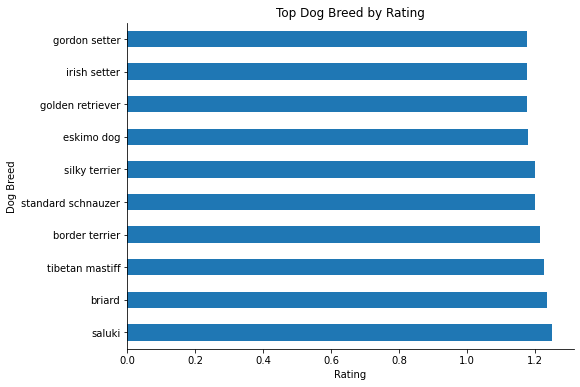

In [223]:
plot(d,'Dog Breed', 'Rating')

> - the Dog breed `saluki` is the top rated 

##### Q2. What are the Top Rated Dog stages?

In [224]:
d = master_df.query('p1_dog == True').groupby('stage')['rating'].mean().sort_values(ascending=True )
d

stage
pupper            1.095326
doggo, floofer    1.100000
doggo, pupper     1.114286
doggo             1.200000
floofer           1.200000
puppo             1.200000
doggo, puppo      1.300000
Name: rating, dtype: float64

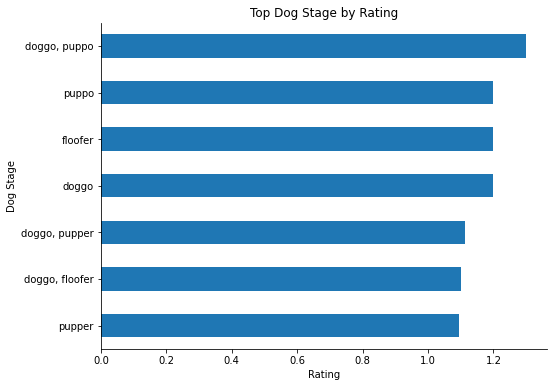

In [225]:
plot(d,'Dog Stage', 'Rating')

> - Dogs with the Doggo, Puppo stages are the most rated

##### Q3. What is the most dog stages tweeted?

In [226]:
d = master_df.query('p1_dog == True')['stage'].value_counts().sort_values(ascending=True)
d

doggo, puppo        1
doggo, floofer      1
floofer             7
doggo, pupper       7
puppo              19
doggo              47
pupper            144
Name: stage, dtype: int64

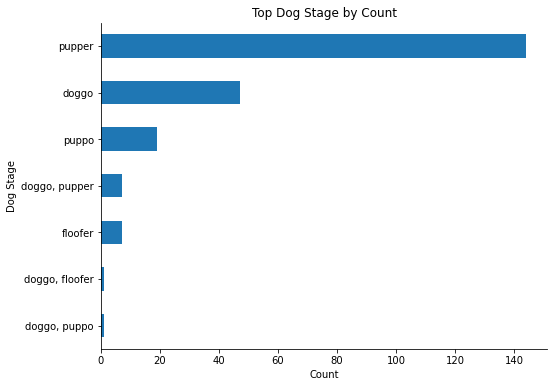

In [227]:
plot(d,'Dog Stage','Count')

> - Dogs in the Pupper stages are the one with most tweets

#### Q4. What is the Top 10 most tweeted Dog breeds?

In [228]:
d = master_df.query('p1_dog == True')['p1'].value_counts()[:10].sort_values(ascending=True)
d

malamute               29
toy poodle             36
pomeranian             38
samoyed                39
chow                   41
pug                    54
chihuahua              78
pembroke               88
labrador retriever     91
golden retriever      137
Name: p1, dtype: int64

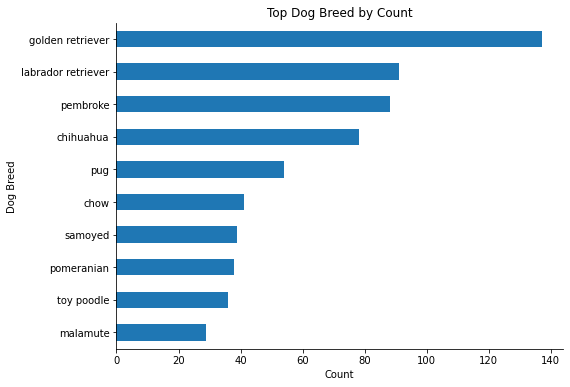

In [229]:
plot(d,'Dog Breed', 'Count')

> - Golden retriever, Labrador retriever, pembroke are the three most dog breeds tweeted

#### Q5. What is the relationship between retweets and likes?

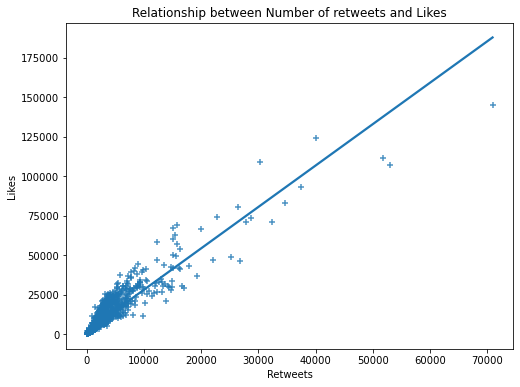

In [246]:
plt.figure(figsize=(8,6))
sns.regplot(x='retweet_count',y='favorite_count', ci=None, data=master_df, marker='+')
plt.title(f'Relationship between Number of retweets and Likes')
plt.ylabel('Likes')
plt.xlabel('Retweets')
plt.show()

> - There's a strong correlation between Likes and retweets, we can say the higher the likes the higher the number of retweets for a given tweet.

#### Q6. What is the most liked Dog breeds?

In [230]:
d = master_df.query('p1_dog == True').groupby('p1')['favorite_count'].mean().sort_values(ascending=False )[:10]
d

p1
saluki                     20827.500000
french bulldog             16368.840000
afghan hound               14726.000000
black and tan coonhound    14691.000000
giant schnauzer            14683.000000
flat coated retriever      14539.500000
irish water spaniel        13992.666667
standard poodle            13650.857143
english springer           13466.333333
cardigan                   13068.705882
Name: favorite_count, dtype: float64

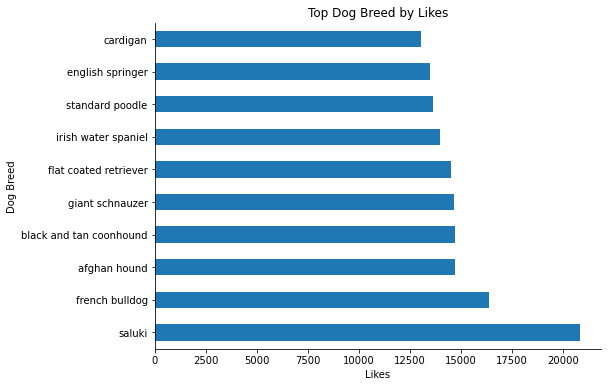

In [231]:
plot(d,'Dog Breed','Likes')

> - Saluki Dog breeds are the most liked Dogs 

#### Q7. What are the most retweeted dog stage?

In [247]:
d = master_df.query('p1_dog == True').groupby('stage')['retweet_count'].mean().sort_values(ascending=True )
d

stage
pupper             2075.090278
doggo, floofer     2806.000000
doggo, pupper      3964.571429
floofer            3994.714286
puppo              5424.052632
doggo              6445.617021
doggo, puppo      16163.000000
Name: retweet_count, dtype: float64

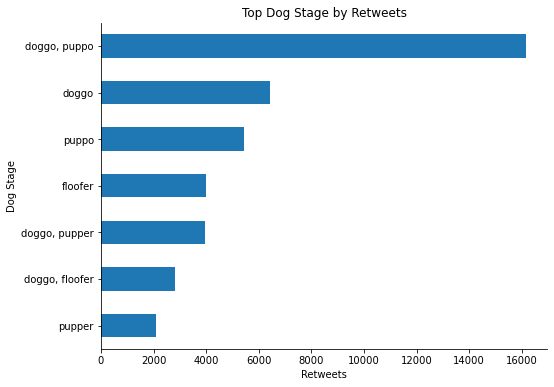

In [248]:
plot(d,'Dog Stage','Retweets')

#### Q8. what are the most liked Dog stage? 

In [249]:
d = master_df.query('p1_dog == True').groupby('stage')['favorite_count'].mean().sort_values(ascending=True )
d

stage
pupper             6977.020833
floofer           11239.428571
doggo, pupper     13484.000000
doggo, floofer    14864.000000
doggo             19030.744681
puppo             20413.263158
doggo, puppo      41955.000000
Name: favorite_count, dtype: float64

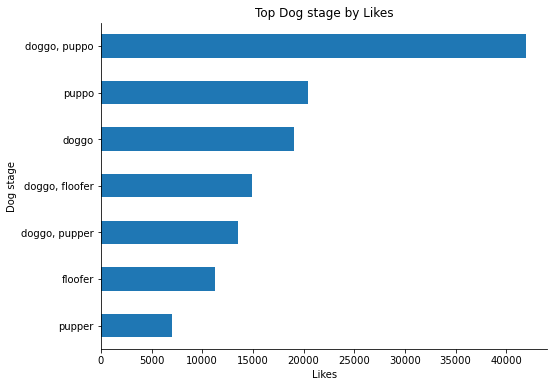

In [250]:
plot(d,'Dog stage','Likes')

### Insights

- People’s likes and retweets indicate that combination of puppo and doggo are the most liked and retweeted dogs
- Most of the dogs tweeted are ‘golden retriever’ breeds as predicted by a Neural Network developed by the WeRateDogs Company
- A strong relationship is seen between retweets and likes as expected.
- The dog breed Saluki is the one with the most average ratings 